### Aluno: Wesley Wevertton de Azevedo Palmeira - 201621250039
### Disciplina: Sinais e Sistemas


### TAREFA 1: Reproduzir e explicar os resultados do artigo do link 2, considerando ao menos três amostrasde som disponíveis neste site.

In [760]:
def fourierSeries(period, N):
    """Cálculo dos coeficientes da série de fourier até o n-ésimo harmônico"""
    result = []
    T = len(period)
    t = np.arange(T)
    for n in range(N+1):
        an = 2/T*(period * np.cos(2*np.pi*n*t/T)).sum()
        bn = 2/T*(period * np.sin(2*np.pi*n*t/T)).sum()
        result.append((an, bn))
    return np.array(result)

In [761]:
def reconstruct(P, anbn):
    """Sum up sines and cosines according to the coefficients to 
    produce a reconstruction of the original waveform"""
    result = 0
    t = np.arange(P)
    for n, (a, b) in enumerate(anbn):
        if n == 0:
            a = a/2
        result = result + a*np.cos(2*np.pi*n*t/P) + b * np.sin(2*np.pi*n*t/P)
    return result

In [762]:
from scipy.io import wavfile
import requests
from io import BytesIO
from IPython.display import Audio
def loadSound(url):
    R = requests.get(url)
    rate, data = wavfile.read(BytesIO(R.content))
    data = data * 1.0 / (abs(data).max())
    if len(data.shape) > 1:  # for stereo data, use only first channel
        data = data[:,0]
    return data, rate

# the URLs of the wav files
urls = ["https://freewavesamples.com/files/Alesis-Fusion-Shakuhachi-C5.wav",
       "https://freewavesamples.com/files/E-Mu-Proteus-FX-Ocarina-C5.wav",
       "https://freewavesamples.com/files/Korg-M3R-Pan-Pipes-C5.wav"]
sounds = []
for url in urls:
    sound, rate = loadSound(url)
    sounds.append((sound, rate))

In [763]:
# Utility function two display two audios side by side in the notebook
def audioSideBySide(name1, audio1, name2, audio2):
    text = '%s %s \n %s %s' % (name1, audio1._repr_html_(), name2, audio2._repr_html_())
    display(HTML(text))

In [764]:
from IPython.core.display import HTML
for n, s in enumerate(sounds):
    display(HTML("Saxophone sound %d" % (n+1) + Audio(data=s[0], rate=s[1])._repr_html_()))

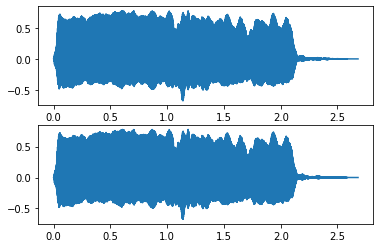

In [765]:
import numpy as np
import matplotlib.pyplot as plt
t = np.arange(len(sounds[0][0])) / sounds[0][1]
plt.subplot(211)
plt.plot(t, sounds[0][0])
plt.subplot(212)
plt.plot(t, sounds[0][0])

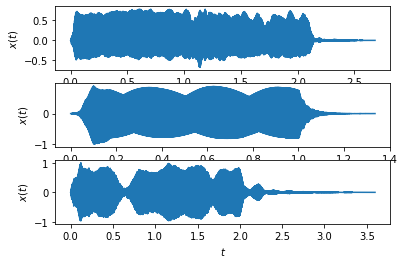

In [766]:
def extractPeriod(data, rate, t_start, t_end):
    t = np.arange(0,len(data))/rate
    plt.plot(t, data)

    duration = t_end - t_start
    plt.xlabel('$t$'); plt.ylabel('$x(t)$');


    sample_start = int(t_start * rate)
    sample_end = int(t_end*rate)

    period = data[sample_start:sample_end]
    audioSideBySide("Original", Audio(data=data,rate=rate),
                    "Extracted period", Audio(np.tile(period, int(1/duration)), rate=rate))
    return period, rate

periods = []
rates = []
# The manually found start and end time of one period of the signal
periodBounds = [(0.1,0.125),
                (0.1,0.125),
                (1.3,1.325)]
for n, (S, P) in enumerate(zip(sounds, periodBounds)):
    plt.subplot(len(sounds), 1, n+1)
    period, rate = extractPeriod(S[0], S[1], P[0], P[1])
    periods.append(period); rates.append(rate)

In [767]:
def approximateUpToNthHarmonic(period, rate, N):
    t = np.arange(len(period)) / rate
    duration = t.max()
    F = fourierSeries(period, N)
    powers = np.sqrt(np.sum(F**2, axis=1))
    reconstructed = reconstruct(len(period), F)
    plt.figure()
    plt.subplot(121)
    plt.plot(t*1000, period, label='Original') 
    plt.plot(t*1000, reconstructed, label='Reconstructed')
    plt.subplot(122)
    plt.stem(powers,use_line_collection = True)
    
    audioSideBySide("Original", Audio(data=np.tile(period, int(0.7/duration)), rate=rate), 
                    "Reconstructed up to %d harmonics" % N, Audio(data=np.tile(reconstructed, int(0.7/duration)), rate=rate))

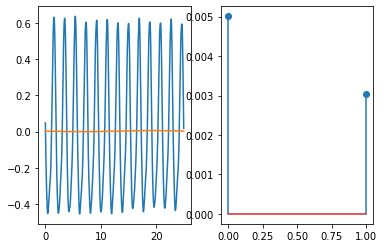

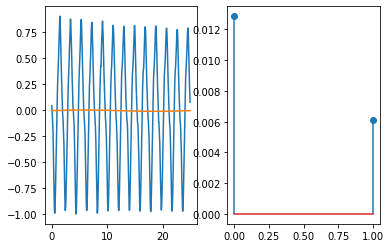

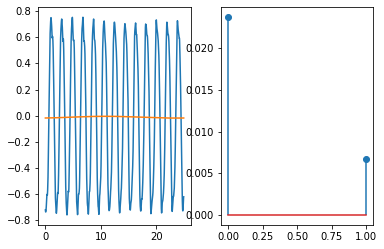

In [768]:
for P, R in zip(periods, rates):
    approximateUpToNthHarmonic(P, R, 1)

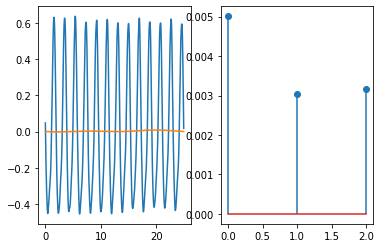

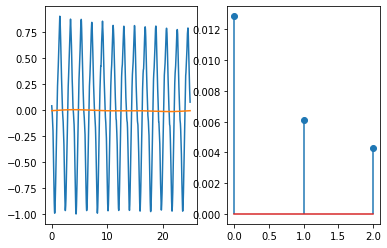

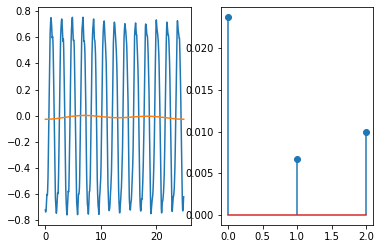

In [769]:
for P, R in zip(periods, rates):
    approximateUpToNthHarmonic(P, R, 2)

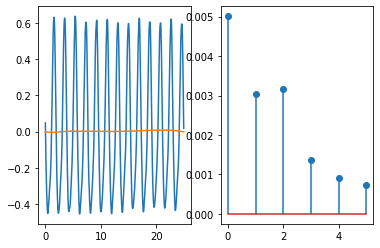

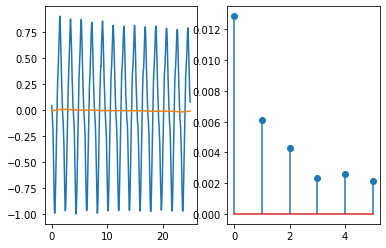

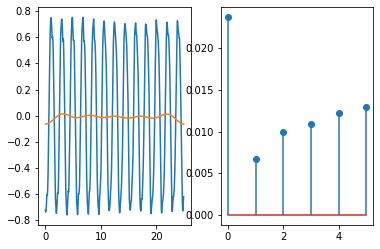

In [770]:
for P, R in zip(periods, rates):
    approximateUpToNthHarmonic(P, R, 5)

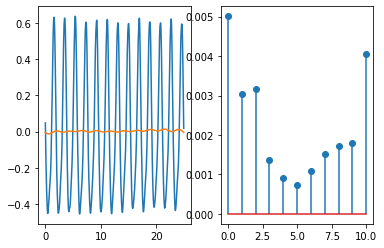

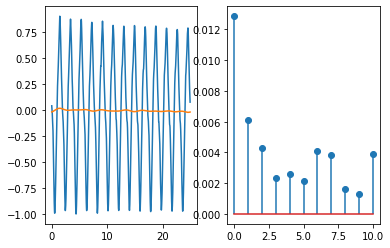

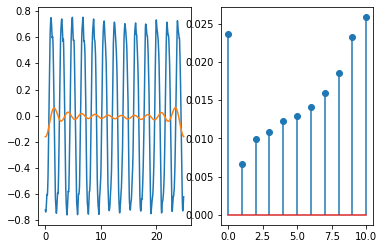

In [771]:
for P, R in zip(periods, rates):
    approximateUpToNthHarmonic(P, R, 10)

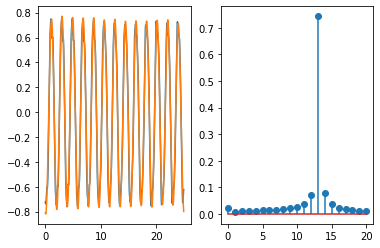

In [772]:
for P, R in list(zip(periods, rates))[2:]:
    approximateUpToNthHarmonic(P, R, 20)

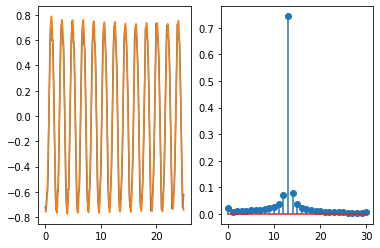

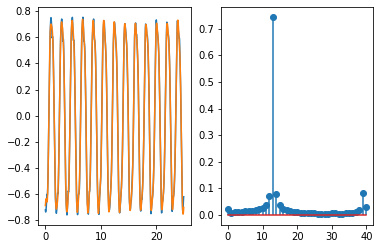

In [773]:
for P, R in list(zip(periods, rates))[2:]:
    approximateUpToNthHarmonic(P, R, 30)
    approximateUpToNthHarmonic(P, R, 40)

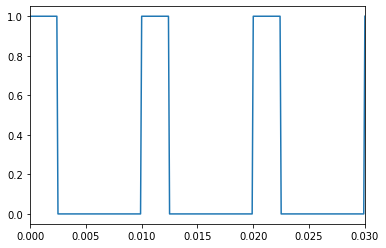

In [774]:
Fs = 10000
F = 100
N = Fs/F
T=1
period = (np.arange(N) < (N/4)).astype(float)
t = np.arange(0, T, 1/Fs)
signal = np.tile(period, T*F)
plt.xlim(right=0.03)
plt.plot(t, signal)
Audio(data=signal, rate=Fs)

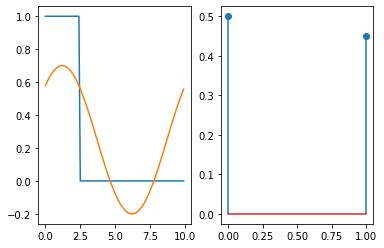

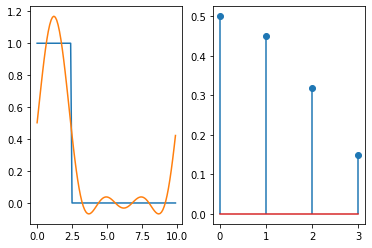

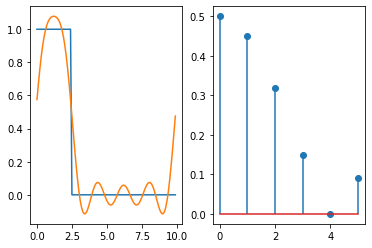

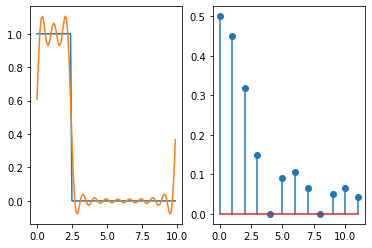

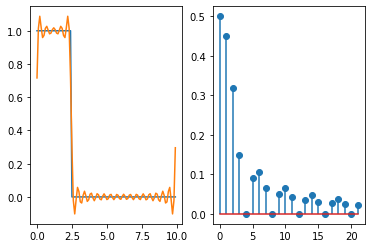

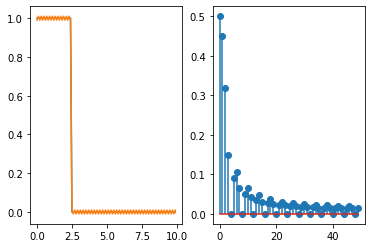

In [775]:
for N in [1, 3, 5, 11, 21, 49]:
    approximateUpToNthHarmonic(period, Fs, N)